# Week 4

## Python setup

In [1]:
import json
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import re
import urllib.request

## Exercises Prelude: Regular expressions

### 0.1 Tutorial in RegEx
_Honestly, this [youtube](https://www.youtube.com/watch?v=rhzKDrUiJVk) guide is waaaayyyy better than the google guide..._

Regular expressions are a powerful language for matching text patterns.

The Python "re" module provides regular expression support.

In [2]:
# If-statement after search() tests if it succeeded
def check_regex(match):
    if match:
      print('found:', match.group())
    else:
      print('did not find')

In RegEx, we are interested in using a pattern, 'pat', to search through a text, 'str'. The pattern is defined as an regular expression based on a defined syntax. In python's 're' library, each pattern starts with a 'r' followed by the expression. 

_Note that the syntax in python is a bit different than traditional RegEx!_

In [3]:
str = 'purple alice-b@google.com monkey dishwasher'
pat = r'([\w.-]+)@([\w.-]+)'

# The re.search() function returns a match type, which contains groups
match = re.search(pat, str)

check_regex(match)

found: alice-b@google.com


Group Extraction - We can split our result into groups and then extract them separately.

In [4]:
print(match.group(0)) # (the whole match)
print(match.group(1)) # (the username, group 1)
print(match.group(2)) # (the host, group 2)

alice-b@google.com
alice-b
google.com


The most powerful function in re is findall(), which returns a list of regex results. 

In [5]:
## Suppose we have a text with many email addresses
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

pat = r'([\w\.-]+@[\w\.-]+)'

## Here re.findall() returns a list of all the found email strings
emails = re.findall(pat, str) ## ['alice@google.com', 'bob@abc.com']

for email in emails:
    # do something with each found email string
    print(email)

alice@google.com
bob@abc.com


The findall function can also be used on files!

In [6]:
# Open file
f = open('../files/hamlet_act_1_scene_1.txt', encoding='utf-8')

# Get only scenographic instructions, marked by '(...)'
pat = r'\(([^)]+)\)'

# Feed the file text into findall(); it returns a list of all the found strings
strings = re.findall(pat, f.read())
strings

['Enter Barnardo and Francisco, two sentinels.',
 'Enter Horatio and Marcellus.']

Findall and Groups can be used to sub divide the search results. 

In [7]:
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
pat = r'([\w\.-]+)@([\w\.-]+)'

tuples = re.findall(pat, str)

print(tuples)  ## [('alice', 'google.com'), ('bob', 'abc.com')]

for tuple in tuples:
    print(f"Username: \"{tuple[0]}\", Host: \"{tuple[1]}\"")

[('alice', 'google.com'), ('bob', 'abc.com')]
Username: "alice", Host: "google.com"
Username: "bob", Host: "abc.com"


### 0.2 What are regular expressions

A regular expression is a string, which follows a predefined syntax that enables pattern recognition in texts.

### 0.3 RegEx on 4-digit numbers from URL text

Find all 4-digit numbers in [this text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).

In [8]:
# Define the url
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt"

# Get HTTPResponse from url
data = urllib.request.urlopen(url)

# Extract byte string from reponse data
byte_string = data.read()

# Decode byte string to regular string
text = byte_string.decode("utf-8")

In [9]:
# Get only 4-digit numbers
pat = r'(?<!\d)\d{4}(?!\d)'

# Feed the file text into findall(); it returns a list of all the found strings
numbers = re.findall(pat, text)

# Print digist one at a time on new lines 
print(*numbers, sep="\n")

1234
9999


### 0.4 RegEx for words starting with 'super' from URL text

In [10]:
# Get only words starting with 'super'
pat = r'super[\w+]*'

# Feed the file text into findall(); it returns a list of all the found strings
words = re.findall(pat, text)

# Print digist one at a time on new lines 
print(*words, sep="\n")

superpolaroid
supertaxidermy
superbeer


### 0.5 RegEx find Wiki links in URL text

In [11]:
def find_all_wiki_links(text):
    # Get any strings surrounded by '[[...]]'
    pat = r'\[\[(.*?)\]\]' 
    pat = r'\[\[(?!Category:)(?!File:)(?!Image:)(.*?)\]\]'
    matches = re.findall(pat, text)
    
    # List to hold the final substrings
    results = []
    for match in matches:
        # Remove content in parentheses and split by '|'
        cleaned_substrings = re.sub(r'\s*\(.*?\)\s*', '', match).split('|')
        results.extend(cleaned_substrings)
    
    # Create urls from wiki links one at a time while replacing spaces with '_' 
    urls = []
    for res in results:
        res = res.replace(" ", "_")
        urls.append("https://en.wikipedia.org/wiki/" + res)

    # Remove dublicate results and urls
    results = list(dict.fromkeys(results))
    urls = list(dict.fromkeys(urls))
    
    return urls, results 

# Find all wiki_link urls and print them out
urls, results = find_all_wiki_links(text)

print(f"Results ({len(results)} found):")
print(f"Urls ({len(urls)} found):")
print(*urls, sep="\n")

Results (6 found):
Urls (6 found):
https://en.wikipedia.org/wiki/drinking_vinegar
https://en.wikipedia.org/wiki/gentrify
https://en.wikipedia.org/wiki/hashtag
https://en.wikipedia.org/wiki/Bicycle
https://en.wikipedia.org/wiki/Pitchfork
https://en.wikipedia.org/wiki/Pitchfork_Magazine


## Exercises Part 1: Download the Wikipedia pages of characters

### 1.1 Extract all links into a list of country performers
We use the wikipedia API to fetch the content of the wikipedia page: https://en.wikipedia.org/wiki/List_of_country_music_performers

In [12]:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=List_of_country_music_performers"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
print(query)

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=List_of_country_music_performers&format=json


In [13]:
wikiresponse = urllib.request.urlopen(query)
wikidata = wikiresponse.read()
wikitext = wikidata.decode('utf-8')
json_response = json.loads(wikitext)

In [14]:
# Get the latest page number
page = list(json_response["query"]["pages"].keys())[0]
page

'328877'

In [15]:
# Get text content from page
text = json_response["query"]["pages"][page]["revisions"][0]["*"]

In [16]:
# Find all wiki_link urls and print them out
urls, results = find_all_wiki_links(text)
print(f"Urls ({len(urls)} found):")
print(*urls, sep="\n")

Urls (2110 found):
https://en.wikipedia.org/wiki/country_music
https://en.wikipedia.org/wiki/3_of_Hearts
https://en.wikipedia.org/wiki/4_Runner
https://en.wikipedia.org/wiki/8_Ball_Aitken
https://en.wikipedia.org/wiki/Gene_Autry
https://en.wikipedia.org/wiki/Eddy_Arnold
https://en.wikipedia.org/wiki/Roy_Acuff
https://en.wikipedia.org/wiki/Rodney_Atkins
https://en.wikipedia.org/wiki/The_Abrams_Brothers
https://en.wikipedia.org/wiki/Ace_in_the_Hole_Band
https://en.wikipedia.org/wiki/Kay_Adams
https://en.wikipedia.org/wiki/Ryan_Adams
https://en.wikipedia.org/wiki/Doug_Adkins
https://en.wikipedia.org/wiki/Trace_Adkins
https://en.wikipedia.org/wiki/David_"Stringbean"_Akeman
https://en.wikipedia.org/wiki/Rhett_Akins
https://en.wikipedia.org/wiki/Alabama
https://en.wikipedia.org/wiki/Lauren_Alaina
https://en.wikipedia.org/wiki/Jason_Aldean
https://en.wikipedia.org/wiki/Alee
https://en.wikipedia.org/wiki/Daniele_Alexander
https://en.wikipedia.org/wiki/Jessi_Alexander
https://en.wikipedia.org/w

### 1.2 Download the content of each wiki link and save them to a text file

In [244]:
# Folder to store the text files
cwd = os.getcwd()
folder_name = "wiki_text"
folder_path = os.path.join(cwd, folder_name)
folder_path

'C:\\Users\\Aleksandar\\School\\02805_Social_Graphs_and_Interactions\\Exercise_solutions\\wiki_text'

In [245]:
# Check if the folder exists, otherwise create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [18]:
def get_result_content(result):
    # Create query using wikipedia's API
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    
    # Add '_' for proper url format
    result = result.replace(" ", "_")
    
    # Use urllib.parse.quote to encode special characters
    title = f"titles={urllib.parse.quote(result)}"
    
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    # Get http response from query and decode it
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    json_response = json.loads(wikitext)
    
    # Find latest page and fetch content
    page = list(json_response["query"]["pages"].keys())[0]
    
    # The name gave no hits nor redirects
    if page == '-1':
        return -1
    
    url_content = json_response["query"]["pages"][page]["revisions"][0]["*"]
    
    # Check if the name is redirected, in which case return redirected result
    redirect = re.findall(r'(?<=#redirect )\[\[(.*?)\]\]', url_content)
    if redirect:
        return get_result_content(redirect[0])
    
    return url_content

In [19]:
def save_wikitext_to_txt(name):
    # Artist name becomes the name of the .txt file
    file_name = name

    # Pre-cleans artist name so the file does not get corrupted 
    file_name = re.sub(r'[^a-zA-Z0-9]', '_', file_name) + ".txt"
    
    # File path to where the file will be stored
    file_path = os.path.join(folder_path, file_name)
    
    content = get_result_content(name)
    
    # The name gave no hits nor redirects
    if content == -1:
        return -1
    
    # Create/open file and write content from url
    with open(file_path,'w',encoding='utf-8') as file :
        file.write(content.encode('utf-8').decode('utf-8'))
        file.close()

In [250]:
# Save txt file for every artist in the list
for name in results:
    # Check if file already exists
    name_txt = re.sub(r'[^a-zA-Z0-9]', '_', name) + ".txt"
    if not os.path.exists(os.path.join(folder_path, name_txt)):    
        # The artist name did not lead to any wiki page
        if get_result_content(name)==-1:
            results.remove(name)
        else:
            save_wikitext_to_txt(name)

In [21]:
# Check folder content and print list of files
folder_content = os.listdir(folder_path)
i = 1
for file in folder_content:
    print(f"{i}: {file}")
    i = i+1

1: 3_of_Hearts.txt
2: 4_Runner.txt
3: 8_Ball_Aitken.txt
4: Aaron_Barker.txt
5: Aaron_Benward.txt
6: Aaron_Lewis.txt
7: Aaron_Lines.txt
8: Aaron_Neville.txt
9: Aaron_Pritchett.txt
10: Aaron_Tippin.txt
11: Aaron_Watson.txt
12: Ace_in_the_Hole_Band.txt
13: Adam_Brand.txt
14: Adam_Craig.txt
15: Adam_Gregory.txt
16: Adam_Harvey.txt
17: Adam_Hood.txt
18: Adrienne_Young.txt
19: Alabama.txt
20: Alan_Jackson.txt
21: Alecia_Elliott.txt
22: Alecia_Nugent.txt
23: Alee.txt
24: Aleyce_Simmonds.txt
25: Alisan_Porter.txt
26: Alison_Krauss.txt
27: Allison_Moorer.txt
28: Allison_Russell.txt
29: Alli_Walker.txt
30: Allman_Brothers_Band.txt
31: Alyssa_Micaela.txt
32: Al_Anderson.txt
33: Al_Caiola.txt
34: Al_Dexter.txt
35: Al_Downing.txt
36: Al_Hurricane.txt
37: Al_Hurricane_Jr_.txt
38: Amanda_Shires.txt
39: Amanda_Stott.txt
40: Amanda_Wilkinson.txt
41: Amazing_Rhythm_Aces.txt
42: Amber_Dotson.txt
43: Amber_Hayes.txt
44: Amber_Lawrence.txt
45: American_Young.txt
46: Amie_Comeaux.txt
47: Amy_Dalley.txt
48: 

## Exercises Part 2: Building the networks

### 2.1 Build network based on txt files

In [251]:
# Remove any artist which did not lead to any wiki page
# and update results accordingly
folder_content = os.listdir(folder_path)
new_results = []
for file_name in folder_content:
    for res in results:
        res_name = re.sub(r'[^a-zA-Z0-9]', '_', res) + ".txt"
        if file_name == res_name:
            new_results.append(res)
            continue
            
# Update results in the same order as the file directory
results = new_results

In [23]:
# # If needed, manually check if the two lists are alligned:
# for i in range(len(results)):
#     print(f"[{results[i]}, {folder_content[i]}]")

In [24]:
def get_all_outgoing_links_as_list(file_content):
    # Find all wiki_link urls and print them out
    file_urls, file_results = find_all_wiki_links(file_content)

    # Extract links which are in both the artists wiki as well as in the list of artists
    links = [link for link in file_results if link in results]
    
    return links

In [25]:
# Create list of outgoing link neighbours
list_of_link_lists = []
for txt_file in folder_content:
    # Create file path
    file_path = os.path.join(folder_path, txt_file)
    
    # load text from .txt file
    with open(file_path, 'r', encoding='utf-8') as file:
        file_content = file.read()

    link_list = get_all_outgoing_links_as_list(file_content)
    list_of_link_lists.append(link_list)

In [26]:
# Create dictonary to join artist with outgoing links
keys = results
values = list_of_link_lists
dict_of_link_lists = dict(zip(keys, values))

In [27]:
# Create dictonary to join artist with txt file
keys = results
values = folder_content
dict_of_txt_files = dict(zip(keys, values))

In [28]:
# Function to count the number of words in the wiki content from a txt file
def get_length_of_the_content(txt_file):
    # Create file path
    file_path = os.path.join(folder_path, txt_file)
    
    # load text from .txt file
    with open(file_path, 'r', encoding='utf-8') as file:
        file_content = file.read()
    
    pat = r'\w+'
    words = re.findall(pat, file_content)
    
    return len(words)

We initialise our graph with a node for each artist in the result list

In [42]:
G = nx.DiGraph()

# Add a node for each artist and then add all outgoing links
for k, v in dict_of_link_lists.items():
    G.add_node(
        k, 
        txt_file = dict_of_txt_files[k],
        length_of_content = get_length_of_the_content(dict_of_txt_files[k])
    )
    G.add_edges_from([(k,n) for n in v])

In [43]:
print(G)

DiGraph with 2104 nodes and 18728 edges


In [44]:
# Show attributes of each node
for attrs in G.nodes().data():
    print(attrs)

('3 of Hearts', {'txt_file': '3_of_Hearts.txt', 'length_of_content': 646})
('country music', {'txt_file': 'country_music.txt', 'length_of_content': 30455})
('4 Runner', {'txt_file': '4_Runner.txt', 'length_of_content': 2538})
('Tanya Tucker', {'txt_file': 'Tanya_Tucker.txt', 'length_of_content': 6289})
('Diamond Rio', {'txt_file': 'Diamond_Rio.txt', 'length_of_content': 10259})
('Reba McEntire', {'txt_file': 'Reba_McEntire.txt', 'length_of_content': 21253})
('Amie Comeaux', {'txt_file': 'Amie_Comeaux.txt', 'length_of_content': 889})
('Michael Johnson', {'txt_file': 'Michael_Johnson.txt', 'length_of_content': 723})
('Poco', {'txt_file': 'Poco.txt', 'length_of_content': 120})
('Great Plains', {'txt_file': 'Great_Plains.txt', 'length_of_content': 12179})
('Chely Wright', {'txt_file': 'Chely_Wright.txt', 'length_of_content': 12657})
('Keith Urban', {'txt_file': 'Keith_Urban.txt', 'length_of_content': 10905})
('Chad Brock', {'txt_file': 'Chad_Brock.txt', 'length_of_content': 2020})
('The Je

In [171]:
# Extract the largest connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)

# Create new graph from largest connected component
S = G.subgraph(largest_cc).copy()

In [172]:
# nx.draw(
#     S, 
#     with_labels=False, 
#     node_size=10, 
#     width=0.1, 
#     node_color = "darkblue" 
# )

### 2.2 Simple network statistics and analysis *
For the following calculations, graphs, statistics etc. the largest connected component was used.

Note: Since 'country music' does not refer to an artist but the genre itself, we will manually remove it from the network:

In [173]:
S.remove_node('country music')

##### 2.2.1 What is the number of nodes in the network?

From the below code, we got 2000 nodes. (_When including the genre: 2001 nodes_)

In [174]:
len(S.nodes())

2000

##### 2.2.2 What is the number of links?

From the below code, we got 17173 edges. (_When including the genre: 18683 edges_)

In [175]:
len(S.edges())

17173

##### 2.2.3 Plot the in and out-degree distributions for the entire network.

In [195]:
# sort nodes after in/out-degree
sorted_in_degree = sorted(S.in_degree, key=lambda x: x[1], reverse=True)
sorted_out_degree = sorted(S.out_degree, key=lambda x: x[1], reverse=True)

In [217]:
# Extract in/out-degree from nodes and store separately
in_degree_values = [x[1] for x in sorted_in_degree]
out_degree_values = [x[1] for x in sorted_out_degree]

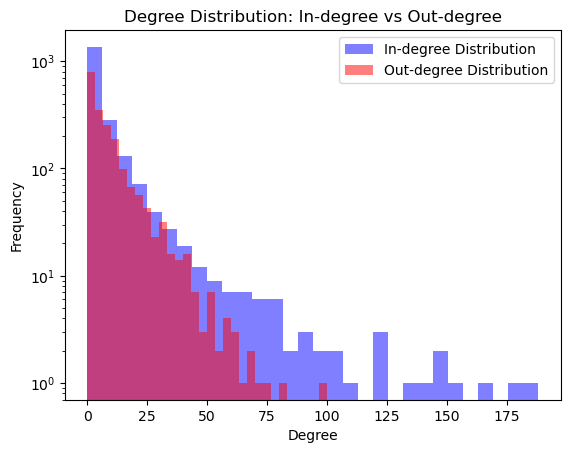

In [264]:
# Histogram of In-degree Distribution
plt.hist(
    in_degree_values, 
    bins=30, 
    alpha=0.5, 
    label="In-degree Distribution", 
    color="blue"
)

# Histogram of Out-degree Distribution
plt.hist(
    out_degree_values, 
    bins=30, 
    alpha=0.5, 
    label="Out-degree Distribution", 
    color="red"
)

# Settings of axis/plot
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.yscale('log')
plt.legend()
plt.title("Degree Distribution: In-degree vs Out-degree")
plt.show()

#### Visualization Insight
The histogram is plotted on a logarithmic scale and shows the frequency of nodes with a given degree. 

There is a characteristic heavy tail on the in-degree distribution. This suggests the presence of some very high in-degree nodes. These are highly referenced artist pages, such as Johnny Cash and Dolly Parton. 

The out-degree distribution is slightly more constrained to the 'lower' degrees. This might be due to most artist's pages focusing primarily on the artist’s own biography and career. This would in return limit the number of outgoing links, leading to a relatively lower out-degree distribution.

#### Compare degree distributions to randomly generated network
We start by generating a random network with nodes and edges equal to that of the country artists network.

##### 2.2.4 Who are the top 5 most connected performers?

**The artists with the highest in-degree:**

    1.  Willie Nelson     : 188
    2.  Johnny Cash       : 179
    3.  Elvis Presley     : 167
    4.  Dolly Parton      : 152
    5.  George Jones      : 146

In [190]:
i = 1
for node, in_degree in sorted_in_degree[:5]:
    idx = f"{i}. "
    name = f"{node}"
    degree = f"{in_degree}"
    
    line = [idx, name, degree]
    print("{: >4} {: <18}: {:}".format(*line))
    i = i+1

 1.  Willie Nelson     : 188
 2.  Johnny Cash       : 179
 3.  Elvis Presley     : 167
 4.  Dolly Parton      : 152
 5.  George Jones      : 146


**The artists with the highest out-degree:**

    1.  Hillary Lindsey   : 100
    2.  Pam Tillis        : 83
    3.  Randy Travis      : 76
    4.  Vince Gill        : 72
    5.  Patty Loveless    : 69

In [191]:
i = 1
for node, out_degree in sorted_out_degree[:5]:
    idx = f"{i}. "
    name = f"{node}"
    degree = f"{out_degree}"
    
    line = [idx, name, degree]
    print("{: >4} {: <18}: {:}".format(*line))
    i = i+1

 1.  Hillary Lindsey   : 100
 2.  Pam Tillis        : 83
 3.  Randy Travis      : 76
 4.  Vince Gill        : 72
 5.  Patty Loveless    : 69


##### 2.2.5 What are the 10 pages with the longest wiki entries?

When running the code below, the following list was returned with the artist name and content word count:

     1.  Beyoncé           : 62853
     2.  Taylor Swift      : 56429
     3.  Miley Cyrus       : 51262
     4.  Justin Bieber     : 50694
     5.  Carrie Underwood  : 45243
     6.  Justin Timberlake : 44779
     7.  Demi Lovato       : 44012
     8.  Bob Dylan         : 41141
     9.  Ed Sheeran        : 36312
    10.  Alabama           : 34386

In [187]:
# Step 1: Access the 'length_of_content' for all nodes
length_of_content_dict = nx.get_node_attributes(S, 'length_of_content')

# Step 2: Sort the nodes by 'length_of_content' in descending order
sorted_nodes = sorted(
    length_of_content_dict.items(), 
    key=lambda x: x[1], 
    reverse=True
)

# Step 3: Get the top 10 nodes
top_10_nodes = sorted_nodes[:10]

# top_10_nodes contains tuples of (node, length_of_content)
i = 1
for node, length_of_content in top_10_nodes:
    idx = f"{i}. "
    name = f"{node}"
    length = f"{length_of_content}"
    
    line = [idx, name, length]
    print("{: >4} {: <18}: {:}".format(*line))
    i = i+1

 1.  Beyoncé           : 62853
 2.  Taylor Swift      : 56429
 3.  Miley Cyrus       : 51262
 4.  Justin Bieber     : 50694
 5.  Carrie Underwood  : 45243
 6.  Justin Timberlake : 44779
 7.  Demi Lovato       : 44012
 8.  Bob Dylan         : 41141
 9.  Ed Sheeran        : 36312
10.  Alabama           : 34386


# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.